In [1]:
#ENEM 2016 - Nota de Matemática
#FONTE: https://medium.com/ensina-ai/machine-learning-randomforest-para-prever-nota-de-matem%C3%A1tica-do-enem-2016-8893b73882f4


In [2]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importando os data frames train e test
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [4]:
#Data frame de saída
df_resposta = pd.DataFrame()

In [5]:
#Verificando colunas do data frame
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [6]:
#Inserindo os dados de inscrições no data frame de resposta
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [7]:
#Selecionando somente valores inteiros e floats do data frame de test
df_test = df_test.select_dtypes(include=['int64','float64'])

In [8]:
#Verificar correlação entre colunas. PelaS correlações positivas e mais altas, foram selecionadas como features as notas obtidas nas outras provas.
df_test.corr()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
CO_UF_RESIDENCIA,1.000000,-0.027277,-0.223924,0.003637,0.044634,-0.055107,0.048962,0.027055,-0.046836,0.072562,...,0.135885,0.143118,-0.101718,-0.054463,0.097031,0.062417,0.072866,0.093678,0.055288,0.084533
NU_IDADE,-0.027277,1.000000,0.006029,-0.004572,-0.256723,0.679562,-0.305114,0.530718,-0.293714,-0.067555,...,-0.048229,-0.079171,0.081890,0.054020,-0.124681,-0.151605,-0.152863,-0.155038,-0.128243,-0.161202
TP_COR_RACA,-0.223924,0.006029,1.000000,0.027840,0.008878,-0.002415,-0.037259,0.023418,0.033100,-0.152762,...,-0.161977,-0.158654,0.119440,0.030188,-0.111649,-0.097166,-0.106149,-0.113439,-0.093965,-0.117604
TP_NACIONALIDADE,0.003637,-0.004572,0.027840,1.000000,0.020665,-0.021385,-0.010738,0.079272,0.012710,-0.021102,...,-0.059370,-0.079824,-0.012146,0.018637,-0.044226,-0.061297,-0.067335,-0.062960,-0.050519,-0.064910
TP_ST_CONCLUSAO,0.044634,-0.256723,0.008878,0.020665,1.000000,-0.596560,0.154720,NaN,0.527566,NaN,...,-0.112692,-0.104270,-0.019467,0.007080,-0.105960,-0.092896,-0.098006,-0.100944,-0.086928,-0.109049
TP_ANO_CONCLUIU,-0.055107,0.679562,-0.002415,-0.021385,-0.596560,1.000000,-0.428168,NaN,-0.252302,NaN,...,0.063830,0.044894,0.040844,-0.011746,0.027401,-0.006863,-0.006219,-0.004171,-0.009040,-0.001123
TP_ESCOLA,0.048962,-0.305114,-0.037259,-0.010738,0.154720,-0.428168,1.000000,-0.050253,-0.247778,0.976290,...,0.054730,0.050485,-0.036728,-0.016245,0.059388,0.090019,0.090184,0.102471,0.084356,0.097388
TP_ENSINO,0.027055,0.530718,0.023418,0.079272,NaN,NaN,-0.050253,1.000000,NaN,-0.032146,...,-0.094929,-0.070557,0.065490,0.087879,-0.120581,-0.159612,-0.155955,-0.157010,-0.122173,-0.160772
IN_TREINEIRO,-0.046836,-0.293714,0.033100,0.012710,0.527566,-0.252302,-0.247778,NaN,1.000000,NaN,...,-0.032181,-0.004934,-0.048790,-0.008688,-0.002073,-0.013833,-0.023881,-0.019524,-0.004485,-0.014277
TP_DEPENDENCIA_ADM_ESC,0.072562,-0.067555,-0.152762,-0.021102,NaN,NaN,0.976290,-0.032146,NaN,1.000000,...,0.286145,0.274803,-0.136473,-0.039044,0.234154,0.225320,0.232888,0.253560,0.255042,0.272487


In [9]:
#Separando as features

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

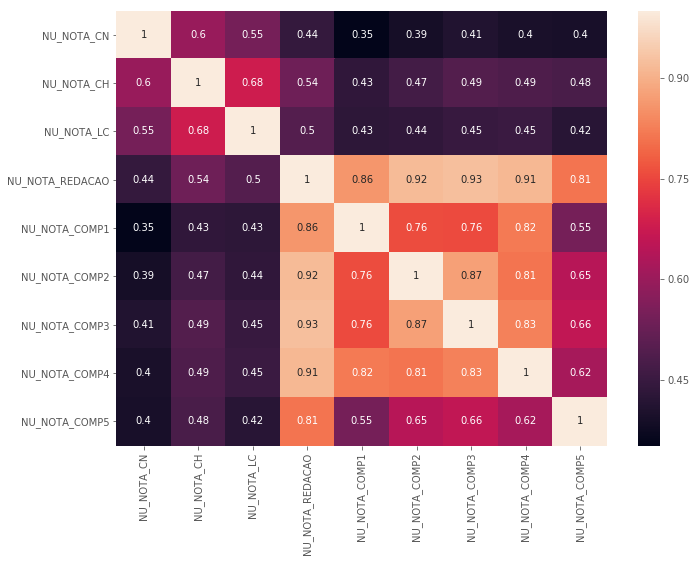

In [10]:
corr = df_test[features].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [11]:
# Usando o loc com uma condição composta para obter somente registros com todas as provas - df_train
df_train = df_train.loc[
    (df_train['NU_NOTA_CN'].notnull()) &
    (df_train['NU_NOTA_CH'].notnull()) &
    (df_train['NU_NOTA_LC'].notnull()) &
    (df_train['NU_NOTA_REDACAO'].notnull()) &
    (df_train['NU_NOTA_COMP1'].notnull()) &
    (df_train['NU_NOTA_COMP2'].notnull()) &
    (df_train['NU_NOTA_COMP3'].notnull()) &
    (df_train['NU_NOTA_COMP4'].notnull()) &
    (df_train['NU_NOTA_COMP5'].notnull()) &
    (df_train['NU_NOTA_MT'].notnull())
]

In [12]:
#Verifica a quantidade de valores nulos na base
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [13]:
# Preencher valores nulos com o valor médio - Tratamento das notas de provas corrompidas
df_train['NU_NOTA_CN'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
df_train['NU_NOTA_CH'].fillna(df_train['NU_NOTA_CH'].mean(), inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(df_train['NU_NOTA_REDACAO'].mean(), inplace=True)
df_train['NU_NOTA_LC'].fillna(df_train['NU_NOTA_LC'].mean(), inplace=True)
df_train['NU_NOTA_COMP1'].fillna(df_train['NU_NOTA_COMP1'].mean(), inplace=True)
df_train['NU_NOTA_COMP2'].fillna(df_train['NU_NOTA_COMP2'].mean(), inplace=True)
df_train['NU_NOTA_COMP3'].fillna(df_train['NU_NOTA_COMP3'].mean(), inplace=True)
df_train['NU_NOTA_COMP4'].fillna(df_train['NU_NOTA_COMP4'].mean(), inplace=True)
df_train['NU_NOTA_COMP5'].fillna(df_train['NU_NOTA_COMP5'].mean(), inplace=True)



df_test['NU_NOTA_CN'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
df_test['NU_NOTA_CH'].fillna(df_train['NU_NOTA_CH'].mean(), inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(df_train['NU_NOTA_REDACAO'].mean(), inplace=True)
df_test['NU_NOTA_LC'].fillna(df_train['NU_NOTA_LC'].mean(), inplace=True)
df_test['NU_NOTA_COMP1'].fillna(df_train['NU_NOTA_COMP1'].mean(), inplace=True)
df_test['NU_NOTA_COMP2'].fillna(df_train['NU_NOTA_COMP2'].mean(), inplace=True)
df_test['NU_NOTA_COMP3'].fillna(df_train['NU_NOTA_COMP3'].mean(), inplace=True)
df_test['NU_NOTA_COMP4'].fillna(df_train['NU_NOTA_COMP4'].mean(), inplace=True)
df_test['NU_NOTA_COMP5'].fillna(df_train['NU_NOTA_COMP5'].mean(), inplace=True)

In [14]:
#Define coluna com nota de matemática como target
y = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]

#Aplicação de escala na base
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [15]:
print('Média: {}'.format(x_train.mean(axis=1)))
print('Desvio padrão: {}'.format(x_train.std(axis=0)))

Média: [-0.04824978  0.36490876  0.20307539 ...  0.31484768 -0.16068008
  0.13296906]
Desvio padrão: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
#Criação da pipeline para crossvalidation
#n_estimators=100 (número de nós) , n_jobs=-1 ( todo o processamento possível) , warm_start=True (mantém o aprendizado e reprocessa o modelo, melhorando-o)
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200, n_jobs=-1, warm_start=True))

In [17]:
#DEFINIÇÃO DE HIPERPARÂMETROS
# max_features : O número de features a considerar quando pesquisar pela melhor separação (testará as 3 opções e identificará a melhor para o modelo)
# max_depth :  Profundidade máxima da árvore de decisão. Se None (nenhuma), os nós serão expandidos até acabar as folhas ou até que elas contenham o mínimo valor de amostras possível.
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [18]:
# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(x_train, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=True))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print(clf.best_params_)

{'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'auto'}


In [27]:
pred_notas = clf.predict(x_test)
pred_notas_treino = clf.predict(x_train)

In [28]:
#Incluindo notas previstas no data frame de resposta
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)

In [29]:
#Verificação dos hiperparâmetros
#MSE: Média quadrática
#MAE: Erro médio absoluto
print('MAE:', metrics.mean_absolute_error(y, pred_notas_treino).round(8)  )
print('MSE:', metrics.mean_squared_error(y, pred_notas_treino).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, pred_notas_treino)).round(8))

MAE: 57.62080231
MSE: 5267.79710052
RMSE: 72.57959149


Text(0, 0.5, 'Predicted Y')

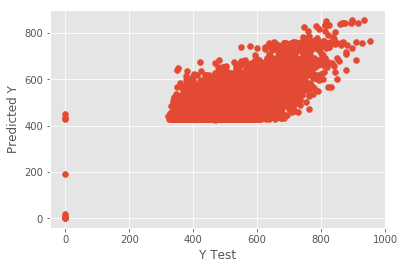

In [31]:
plt.scatter(y,pred_notas_treino)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

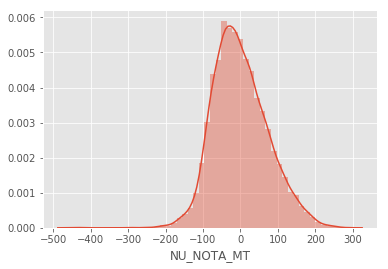

In [32]:
sns.distplot((y-pred_notas_treino),bins=50);

In [33]:
#Comparação entre valores atuais da base de treino e valores previstos pelo algoritmo
df = pd.DataFrame({'Actual': y, 'Predicted': pred_notas_treino})
df

,Actual,Predicted
0,399.4,457.165070
1,459.8,471.812257
5,364.5,483.803871
6,529.2,487.390400
7,566.7,643.399243
8,372.4,472.819085
10,419.6,448.659565
11,369.9,456.421553
12,464.2,460.828559
14,453.4,446.888559
